# Linear Regression - Data Preparation

We will prepare our data a bit more to ultimately do a linear regression. 

We hope to do the following:
1. Remove the rows with missing values (26 fire incidences not assigned to a ward)
2. Sum the number of fire incidences per ward
3. Check that our assigned wards belong to the 2022 ward demarcation - this is important because we will be using census data from the March 2021 census for our independent variables. The data is based on the 2022 ward demarcation.
4. Merge the fire incidence data with the census data and the ward boundaries for our check.

In [135]:
# importing libraries
import os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [136]:
# setting the working directory - change this to your working directory
#import os
os.chdir('/home/jovyan/work/quant_methods/Assessment/Written Investigation/London Dwelling Fires Analysis')
print(os.getcwd())

/home/jovyan/work/quant_methods/Assessment/Written Investigation/Data


## 1. Loading the data

In [137]:
# reading in the residential fire data that we prepared previously
#import pandas as pd 

fires = pd.read_csv('residential_fires2.csv', encoding="utf-8")
print(f"Data frame 1 is {fires.shape[0]:,} x {fires.shape[1]}")

Data frame 1 is 36,572 x 8


Download the London wards shapefile from [here](https://geoportal.statistics.gov.uk/datasets/ons::wards-december-2022-boundaries-gb-bgc/about) then save it in your folder. 

In [138]:
# reading in the wards boundaries shapefile
london_wards = gpd.read_file('WD_DEC_22_GB_BGC.shp')

# filtering only London boroughs
london_wards = london_wards[london_wards['LAD22CD'].str.contains("^E09")]
print(london_wards.head())  # checking the first few rows

         WD22CD        WD22NM WD22NMW    LAD22CD         LAD22NM   BNG_E  \
3225  E05009288    Aldersgate    None  E09000001  City of London  532169   
3226  E05009289       Aldgate    None  E09000001  City of London  533397   
3227  E05009290     Bassishaw    None  E09000001  City of London  532438   
3228  E05009291  Billingsgate    None  E09000001  City of London  533151   
3229  E05009292   Bishopsgate    None  E09000001  City of London  533207   

       BNG_N     LONG      LAT   Shape_Leng  \
3225  181721 -0.09645  51.5190  1726.379875   
3226  181175 -0.07896  51.5138  1895.285289   
3227  181495 -0.09266  51.5169  1428.356359   
3228  180754 -0.08267  51.5100  1670.199009   
3229  181664 -0.08152  51.5182  2748.845505   

                                  GlobalID  \
3225  e218c4c6-cc77-423c-9312-010363f61625   
3226  e968a26f-9af6-460a-a075-7f8ab975cb16   
3227  8b433738-7452-4891-a3b0-17498c13f8ad   
3228  7ff90094-80a5-466d-ae07-b30ec9966ccc   
3229  dbe8b6d5-0c08-4fb5-9c36-

Add a column to `london_wards` called `Inner_Lon` that has a value of 1 if the ward is in Inner London and 0 if it is in Outer London.

We will do this by using the `LAD22CD` column in `london_wards` and the `Inner_Lon_CD` list.

Add a column to `london_wards` called `Inner_Lon` that has a value of 1 if `LAD22CD` is in `Inner_Lon_CD` and 0 otherwise.

In [139]:
Inner_Lon_CD = [
    "E09000007", "E09000001", "E09000012", "E09000013", "E09000014",
    "E09000019", "E09000020", "E09000022", "E09000023", "E09000025",
    "E09000028", "E09000030", "E09000032", "E09000033"
]

In [140]:
london_wards['Inner_Lon'] = london_wards['LAD22CD'].apply(lambda x: 1 if x in Inner_Lon_CD else 0)
print(london_wards.head())

         WD22CD        WD22NM WD22NMW    LAD22CD         LAD22NM   BNG_E  \
3225  E05009288    Aldersgate    None  E09000001  City of London  532169   
3226  E05009289       Aldgate    None  E09000001  City of London  533397   
3227  E05009290     Bassishaw    None  E09000001  City of London  532438   
3228  E05009291  Billingsgate    None  E09000001  City of London  533151   
3229  E05009292   Bishopsgate    None  E09000001  City of London  533207   

       BNG_N     LONG      LAT   Shape_Leng  \
3225  181721 -0.09645  51.5190  1726.379875   
3226  181175 -0.07896  51.5138  1895.285289   
3227  181495 -0.09266  51.5169  1428.356359   
3228  180754 -0.08267  51.5100  1670.199009   
3229  181664 -0.08152  51.5182  2748.845505   

                                  GlobalID  \
3225  e218c4c6-cc77-423c-9312-010363f61625   
3226  e968a26f-9af6-460a-a075-7f8ab975cb16   
3227  8b433738-7452-4891-a3b0-17498c13f8ad   
3228  7ff90094-80a5-466d-ae07-b30ec9966ccc   
3229  dbe8b6d5-0c08-4fb5-9c36-

<Axes: >

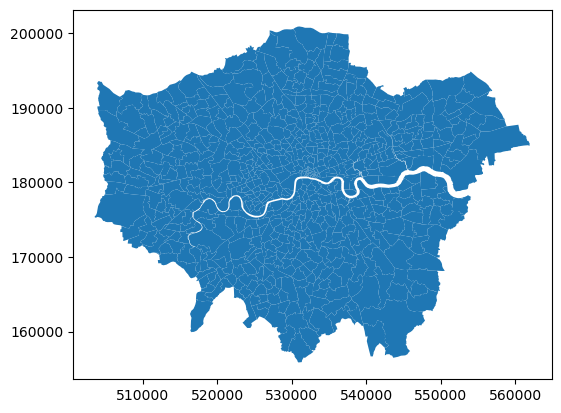

In [141]:
london_wards.plot()  # plotting the shapefile

It looks great! All 704 London wards appear to be present. This number includes 25 City of London wards.

In [142]:
london_wards.crs  # checking the coordinate reference system

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [143]:
london_wards.info()  # checking the data types

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 704 entries, 3225 to 7390
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WD22CD      704 non-null    object  
 1   WD22NM      704 non-null    object  
 2   WD22NMW     0 non-null      object  
 3   LAD22CD     704 non-null    object  
 4   LAD22NM     704 non-null    object  
 5   BNG_E       704 non-null    int64   
 6   BNG_N       704 non-null    int64   
 7   LONG        704 non-null    float64 
 8   LAT         704 non-null    float64 
 9   Shape_Leng  704 non-null    float64 
 10  GlobalID    704 non-null    object  
 11  geometry    704 non-null    geometry
 12  Inner_Lon   704 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 77.0+ KB


In [144]:
# define the columns to keep
london_wards = london_wards[['WD22CD', 'WD22NM', 'Inner_Lon', 'geometry']]

## 2. Grouping and summarizing the fire incidents

We however start by dropping the 26 incidents with missing ward information. We then group the data by ward and sum the number of incidents per ward.

In [145]:
fires = fires.dropna(subset=['IncGeo_WardCode'])
print(f"Data frame after dropping null values is {fires.shape[0]:,} x {fires.shape[1]}")

Data frame after dropping null values is 36,546 x 8


We have dropped 26 rows from Newham Borough which had missing values. 

Now, we will group the data by Ward and summarize the number of incidents in each Ward.

In [146]:
fire_counts = fires.groupby('IncGeo_WardCode').size().reset_index(name='FireCount')
print(fire_counts.head())

  IncGeo_WardCode  FireCount
0       E05000380          1
1       E05009288          2
2       E05009291          2
3       E05009292          3
4       E05009294          1


In [147]:
fire_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IncGeo_WardCode  698 non-null    object
 1   FireCount        698 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


We notice that we have 698 wards represented in the fire records. This is an interesting statistic as it shows that there are 6 wards that are not represented in the summary for residential fires. This is however not unlikey. You can notice there are many wards witha a count of 1 or 2 from the first 5 rows above, it is plausible to have 6 with 0 counts. 

We will keep this in mind for now.

## 3. Checking the ward demarcation

We will first perform a left join between the ward boundaries and the fire incidents. 


In [148]:
# Perform a left join
london_wards_fire_counts = london_wards.merge(fire_counts, left_on='WD22CD', right_on='IncGeo_WardCode', how='left')
print(london_wards_fire_counts.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry IncGeo_WardCode  \
0  POLYGON ((532248.702 181560.298, 532207.098 18...       E05009288   
1  POLYGON ((533466.102 181405.602, 533617.704 18...             NaN   
2  POLYGON ((532536.199 181632.598, 532653.197 18...             NaN   
3  POLYGON ((533320.069 180540.375, 532961.374 18...       E05009291   
4  POLYGON ((533404.564 182037.031, 533351.225 18...       E05009292   

   FireCount  
0        2.0  
1        NaN  
2        NaN  
3        2.0  
4        3.0  


We will first drop the `IncGeo_WardCode` column. Notice the Nan values as well, we will replace these with 0 for the `FireCount` column.

In [149]:
# Drop the 'IncGeo_WardCode' column
london_wards_fire_counts = london_wards_fire_counts.drop(columns=['IncGeo_WardCode'])

print(london_wards_fire_counts.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry  FireCount  
0  POLYGON ((532248.702 181560.298, 532207.098 18...        2.0  
1  POLYGON ((533466.102 181405.602, 533617.704 18...        NaN  
2  POLYGON ((532536.199 181632.598, 532653.197 18...        NaN  
3  POLYGON ((533320.069 180540.375, 532961.374 18...        2.0  
4  POLYGON ((533404.564 182037.031, 533351.225 18...        3.0  


In [150]:
london_wards_fire_counts['FireCount'] = london_wards_fire_counts['FireCount'].fillna(0)
print(london_wards_fire_counts.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry  FireCount  
0  POLYGON ((532248.702 181560.298, 532207.098 18...        2.0  
1  POLYGON ((533466.102 181405.602, 533617.704 18...        0.0  
2  POLYGON ((532536.199 181632.598, 532653.197 18...        0.0  
3  POLYGON ((533320.069 180540.375, 532961.374 18...        2.0  
4  POLYGON ((533404.564 182037.031, 533351.225 18...        3.0  


We will now do a chloropleth map of the fire counts per ward.

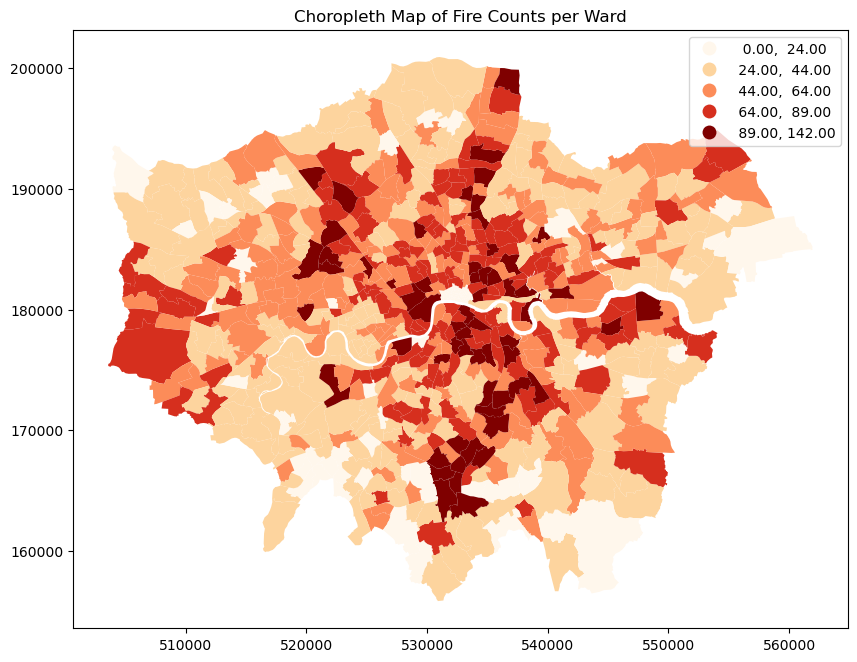

In [151]:
import matplotlib.pyplot as plt

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
london_wards_fire_counts.plot(column='FireCount', ax=ax, legend=True, cmap='OrRd', scheme='NaturalBreaks', k=5)
plt.title('Choropleth Map of Fire Counts per Ward')
plt.show()

The above is just to check that our fire counts are sensible and to have a visual representation of the distribution of the raw counts across all the london wards.

A more useful visualization will be a chloropleth map of the fire rates per ward as these will now be comparable. I will use the number of residents in each ward as the denominator. Alternatives would be population density, or number of households in each ward but because our analysis is based on residential numbers, we will use the number of residents.

In [152]:
london_wards_fire_counts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   WD22CD     704 non-null    object  
 1   WD22NM     704 non-null    object  
 2   Inner_Lon  704 non-null    int64   
 3   geometry   704 non-null    geometry
 4   FireCount  704 non-null    float64 
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 27.6+ KB


Let us also do a histogram of the fire counts to see their distibution in a different way.

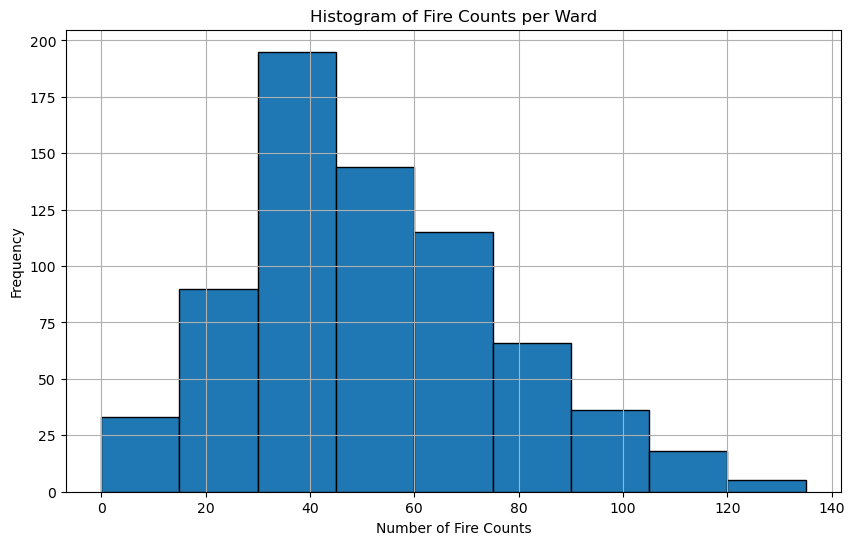

In [153]:
# Plotting the histogram of FireCounts with breaks of 10 for the bins
plt.figure(figsize=(10, 6))
#london_wards_fire_counts['FireCount'].plot(kind='hist', bins=10, edgecolor='black')
london_wards_fire_counts['FireCount'].plot(kind='hist', bins=range(0, 150, 15), edgecolor='black')
plt.title('Histogram of Fire Counts per Ward')
plt.xlabel('Number of Fire Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

I have experimented a bit and fairly confident that the above histogram shows a fair picture of the distribution of fires across the wards. It is a **positively skewed (right-skewed) distribution** with a long tail.

It suggests that most wards experience relatively low or moderate fire occurrences, but a few wards experience a significantly higher number of fire incidents.

We will additionally do one with the natural breaks from the chloropleth above just to understand what we were looking at a bit better.

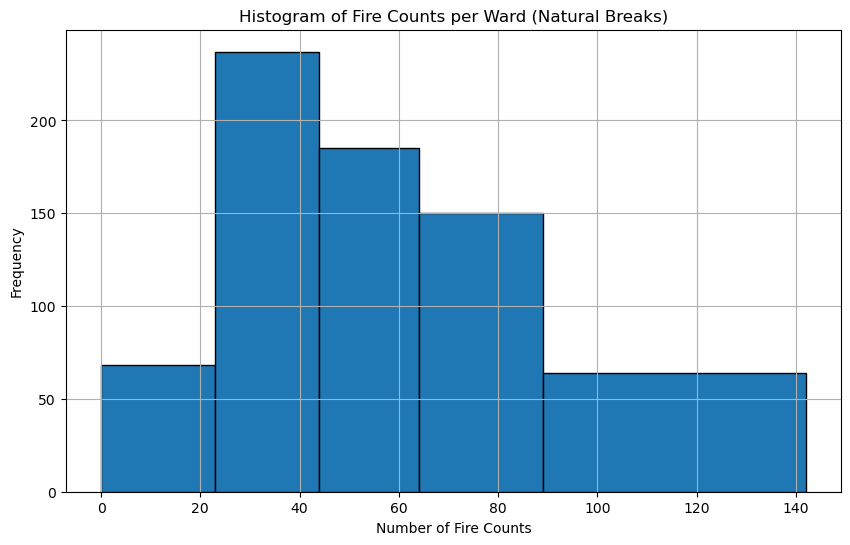

In [154]:
# Define custom breaks (bins) for the histogram
custom_breaks = [0, 23, 44, 64, 89, 142]

# Plotting the histogram using custom breaks
plt.figure(figsize=(10, 6))
london_wards_fire_counts['FireCount'].plot(
    kind='hist',
    bins=custom_breaks,  # Use custom bin edges
    edgecolor='black'
)
plt.title('Histogram of Fire Counts per Ward (Natural Breaks)')
plt.xlabel('Number of Fire Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


4. Calculating the fire rates

We will now calculate the fire rates per ward. We will divide the number of fire incidents by the number of residents in each ward so, let us go ahead and add this data to our dataframe.

In [155]:
#reading in the residents data

residents = pd.read_csv('Usual_Residents_TS001.csv', encoding="utf-8")
print(f"Data frame 1 is {residents.shape[0]:,} x {residents.shape[1]}")

Data frame 1 is 7,638 x 3


In [156]:
# merging with our `london_wards_fire_counts` data frame using a left join

fire_rates = london_wards_fire_counts.merge(residents, left_on='WD22CD', right_on='mnemonic', how='left')
print(fire_rates.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry  FireCount 2022 ward  \
0  POLYGON ((532248.702 181560.298, 532207.098 18...        2.0       NaN   
1  POLYGON ((533466.102 181405.602, 533617.704 18...        0.0       NaN   
2  POLYGON ((532536.199 181632.598, 532653.197 18...        0.0       NaN   
3  POLYGON ((533320.069 180540.375, 532961.374 18...        2.0       NaN   
4  POLYGON ((533404.564 182037.031, 533351.225 18...        3.0       NaN   

  mnemonic  all_residents  
0      NaN            NaN  
1      NaN            NaN  
2      NaN            NaN  
3      NaN            NaN  
4      NaN            NaN  


In [157]:
fire_rates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   WD22CD         704 non-null    object  
 1   WD22NM         704 non-null    object  
 2   Inner_Lon      704 non-null    int64   
 3   geometry       704 non-null    geometry
 4   FireCount      704 non-null    float64 
 5   2022 ward      679 non-null    object  
 6   mnemonic       679 non-null    object  
 7   all_residents  679 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 44.1+ KB


In [158]:
print(fire_rates.head(30))

       WD22CD                   WD22NM  Inner_Lon  \
0   E05009288               Aldersgate          1   
1   E05009289                  Aldgate          1   
2   E05009290                Bassishaw          1   
3   E05009291             Billingsgate          1   
4   E05009292              Bishopsgate          1   
5   E05009293             Bread Street          1   
6   E05009294                   Bridge          1   
7   E05009295             Broad Street          1   
8   E05009296               Candlewick          1   
9   E05009297           Castle Baynard          1   
10  E05009298                    Cheap          1   
11  E05009299           Coleman Street          1   
12  E05009300               Cordwainer          1   
13  E05009301                 Cornhill          1   
14  E05009302              Cripplegate          1   
15  E05009303                  Dowgate          1   
16  E05009304        Farringdon Within          1   
17  E05009305       Farringdon Without        

I have determined that all our NaNs are wards from City of London. We will need to investigate why these are excluded in our Census data. If we cannot find census data that contains City of London wards, then we might have to adjust our analysis to focus on Greater London Wards and ignore City of London wards which predominantly are not residential in nature. This tallies with looking at their FireCounts, which include all our 0s and range from 0 to 8.

Further interrogation of the Census data and looking up the [ONS Website](https://www.ons.gov.uk/filters/5ea78048-189d-41e9-9c53-43f4008c3a8a/dimensions), we realise that the City of London was treated as single ward by the ONS. This also makes sense because of the nature of the City of London described above.

To proceed, we will group and summarise the  City of London wards into one, assign them the City of London local authority code (LAD2022CD) then treat them as one ward for this regression model and analysis. 

In [159]:
# Getting the City of London words, we know that they are the NaN values in the 'mnemonic' column
CoL_rates = fire_rates[fire_rates['mnemonic'].isna()]
print(CoL_rates)

       WD22CD              WD22NM  Inner_Lon  \
0   E05009288          Aldersgate          1   
1   E05009289             Aldgate          1   
2   E05009290           Bassishaw          1   
3   E05009291        Billingsgate          1   
4   E05009292         Bishopsgate          1   
5   E05009293        Bread Street          1   
6   E05009294              Bridge          1   
7   E05009295        Broad Street          1   
8   E05009296          Candlewick          1   
9   E05009297      Castle Baynard          1   
10  E05009298               Cheap          1   
11  E05009299      Coleman Street          1   
12  E05009300          Cordwainer          1   
13  E05009301            Cornhill          1   
14  E05009302         Cripplegate          1   
15  E05009303             Dowgate          1   
16  E05009304   Farringdon Within          1   
17  E05009305  Farringdon Without          1   
18  E05009306           Langbourn          1   
19  E05009307         Lime Street       

In [160]:
# Summarize CoL_rates by summing the FireCount column
CoL_summary = CoL_rates[['FireCount']].sum().to_frame().T

# Assign the specified values to WD22CD and WD22NM
CoL_summary['WD22CD'] = "E09000001"
CoL_summary['WD22NM'] = "City of London"

print(CoL_summary)

   FireCount     WD22CD          WD22NM
0       48.0  E09000001  City of London


We see that the fire counts total to 48 for the City of London wards.

We will now play around with our geodataframe. We will assign all these wards a value of 48 for the `FireCount` and the total no. of residents for the City of London. This is just a workaround so that we are able to plot the chloropleth map of the fire rates per ward. The City of London wards will appear as one block in the map which is what we would like to see or expect had we been able to get the geometry for the entire City of London in the geodataframe.

In [161]:
# We will create a fire rates simulated geodataframe called `fire_rates_sim_gdf`

fire_rates_sim_gdf = fire_rates.copy()

# Replace NaN values in 'mnemonic' and 'all_residents'
fire_rates_sim_gdf['mnemonic'] = fire_rates_sim_gdf['mnemonic'].fillna("E09000001")
fire_rates_sim_gdf['all_residents'] = fire_rates_sim_gdf['all_residents'].fillna(8583.0)

# Replace the first 25 values of 'FireCount' with 48.0 (all the values in the City of London wards)
fire_rates_sim_gdf.loc[0:24, 'FireCount'] = 48.0

# drop the `2022 ward` column
fire_rates_sim_gdf = fire_rates_sim_gdf.drop(columns=['2022 ward'])

print(fire_rates_sim_gdf.head(30))

       WD22CD                   WD22NM  Inner_Lon  \
0   E05009288               Aldersgate          1   
1   E05009289                  Aldgate          1   
2   E05009290                Bassishaw          1   
3   E05009291             Billingsgate          1   
4   E05009292              Bishopsgate          1   
5   E05009293             Bread Street          1   
6   E05009294                   Bridge          1   
7   E05009295             Broad Street          1   
8   E05009296               Candlewick          1   
9   E05009297           Castle Baynard          1   
10  E05009298                    Cheap          1   
11  E05009299           Coleman Street          1   
12  E05009300               Cordwainer          1   
13  E05009301                 Cornhill          1   
14  E05009302              Cripplegate          1   
15  E05009303                  Dowgate          1   
16  E05009304        Farringdon Within          1   
17  E05009305       Farringdon Without        

In [162]:
# Create a new column calculating the fire rates
fire_rates_sim_gdf['FireRate'] = (fire_rates_sim_gdf['FireCount'] * 1000) / fire_rates_sim_gdf['all_residents']
print(fire_rates_sim_gdf.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry  FireCount   mnemonic  \
0  POLYGON ((532248.702 181560.298, 532207.098 18...       48.0  E09000001   
1  POLYGON ((533466.102 181405.602, 533617.704 18...       48.0  E09000001   
2  POLYGON ((532536.199 181632.598, 532653.197 18...       48.0  E09000001   
3  POLYGON ((533320.069 180540.375, 532961.374 18...       48.0  E09000001   
4  POLYGON ((533404.564 182037.031, 533351.225 18...       48.0  E09000001   

   all_residents  FireRate  
0         8583.0   5.59245  
1         8583.0   5.59245  
2         8583.0   5.59245  
3         8583.0   5.59245  
4         8583.0   5.59245  


In [163]:
fire_rates_sim_gdf['FireRate'] = fire_rates_sim_gdf['FireRate'].round(3)
print(fire_rates_sim_gdf.head())

      WD22CD        WD22NM  Inner_Lon  \
0  E05009288    Aldersgate          1   
1  E05009289       Aldgate          1   
2  E05009290     Bassishaw          1   
3  E05009291  Billingsgate          1   
4  E05009292   Bishopsgate          1   

                                            geometry  FireCount   mnemonic  \
0  POLYGON ((532248.702 181560.298, 532207.098 18...       48.0  E09000001   
1  POLYGON ((533466.102 181405.602, 533617.704 18...       48.0  E09000001   
2  POLYGON ((532536.199 181632.598, 532653.197 18...       48.0  E09000001   
3  POLYGON ((533320.069 180540.375, 532961.374 18...       48.0  E09000001   
4  POLYGON ((533404.564 182037.031, 533351.225 18...       48.0  E09000001   

   all_residents  FireRate  
0         8583.0     5.592  
1         8583.0     5.592  
2         8583.0     5.592  
3         8583.0     5.592  
4         8583.0     5.592  


In [164]:
fire_rates_sim_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   WD22CD         704 non-null    object  
 1   WD22NM         704 non-null    object  
 2   Inner_Lon      704 non-null    int64   
 3   geometry       704 non-null    geometry
 4   FireCount      704 non-null    float64 
 5   mnemonic       704 non-null    object  
 6   all_residents  704 non-null    float64 
 7   FireRate       704 non-null    float64 
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 44.1+ KB


Now we are ready to do a chloropleth map of the fire rates per ward.

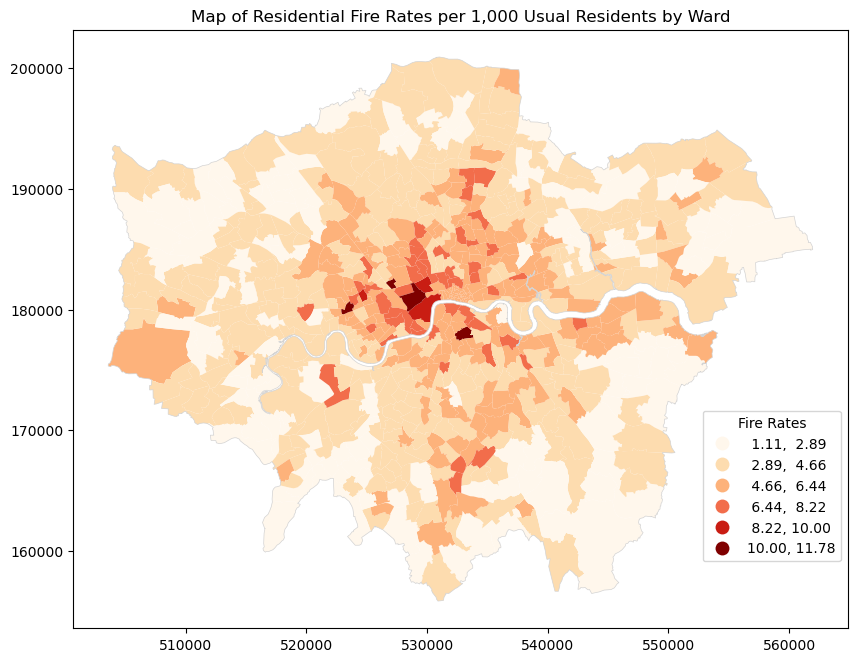

In [187]:
# Plotting the choropleth map

plt.style.use('default')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fire_rates_sim_gdf.plot(
    column='FireRate', 
    ax=ax, 
    legend=True, 
    cmap='OrRd', 
    scheme='Equal_Interval', 
    k=6,
    #edgecolor='lightgray',  # Set boundaries to dark (black)
    legend_kwds={
        'loc': 'lower right',  # Position the legend
        'bbox_to_anchor': (1, 0.1),  # Fine-tune exact position
        'title': 'Fire Rates',  # Add a title to the legend
        'fontsize': 'medium'   # Adjust the font size
    }
)

# Extract and plot the outermost boundary
outer_boundary = gpd.GeoSeries(fire_rates_sim_gdf.geometry.union_all())  # Merge all geometries
outer_boundary.plot(ax=ax, color='none', edgecolor='lightgray', linewidth=0.5)  # Highlight outer boundary

plt.title('Map of Residential Fire Rates per 1,000 Usual Residents by Ward')
plt.show()

In [166]:
# Create a new fire_rates_df pandas data frame excluding the City of London wards

fire_rates_df = fire_rates.dropna(subset=['mnemonic'])
print(f"Data frame after dropping null values is {fire_rates_df.shape[0]:,} x {fire_rates_df.shape[1]}")


Data frame after dropping null values is 679 x 8


In [167]:
# Drop 3 columns
fire_rates_df = fire_rates_df.drop(columns=['2022 ward', 'mnemonic', 'geometry'])

#resetting the index
fire_rates_df = fire_rates_df.reset_index(drop=True)

print(fire_rates_df.head())

      WD22CD                   WD22NM  Inner_Lon  FireCount  all_residents
0  E05009317            Bethnal Green          1       94.0        21090.0
1  E05009318  Blackwall & Cubitt Town          1       97.0        21426.0
2  E05009319                 Bow East          1       93.0        19526.0
3  E05009320                 Bow West          1       52.0        13711.0
4  E05009321            Bromley North          1       84.0        11702.0


In [168]:
# Append a new row of City of London to fire_rates_df
new_row = pd.DataFrame([['E09000001', 'City of London', 1, 48.0, 8583.0]], columns=['WD22CD', 'WD22NM', 'Inner_Lon', 'FireCount', 'all_residents'])
fire_rates_df = pd.concat([fire_rates_df, new_row], ignore_index=True)

print(fire_rates_df.tail())

        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents
675  E05014116        Streatham Wells          1       32.0         9757.0
676  E05014117               Vauxhall          1       68.0         9733.0
677  E05014118  Waterloo & South Bank          1       54.0         8858.0
678  E05014119           West Dulwich          1       32.0        11384.0
679  E09000001         City of London          1       48.0         8583.0


In [169]:
fire_rates_df['FireRate'] = (fire_rates_df['FireCount'] * 1000) / fire_rates_df['all_residents']
print(fire_rates_df.tail())

        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  
675  3.279697  
676  6.986541  
677  6.096184  
678  2.810963  
679  5.592450  


In [170]:
fire_rates_df['FireRate'] = fire_rates_df['FireRate'].round(3)
print(fire_rates_df.head())

      WD22CD                   WD22NM  Inner_Lon  FireCount  all_residents  \
0  E05009317            Bethnal Green          1       94.0        21090.0   
1  E05009318  Blackwall & Cubitt Town          1       97.0        21426.0   
2  E05009319                 Bow East          1       93.0        19526.0   
3  E05009320                 Bow West          1       52.0        13711.0   
4  E05009321            Bromley North          1       84.0        11702.0   

   FireRate  
0     4.457  
1     4.527  
2     4.763  
3     3.793  
4     7.178  


In [171]:
fire_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WD22CD         680 non-null    object 
 1   WD22NM         680 non-null    object 
 2   Inner_Lon      680 non-null    int64  
 3   FireCount      680 non-null    float64
 4   all_residents  680 non-null    float64
 5   FireRate       680 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.0+ KB


In [172]:
#exporting the data as a csv file
#fire_rates_df.to_csv('test_fire_rates.csv', index=False, encoding='utf-8')

Now we can do a histogram of the fire rates to see their distribution.

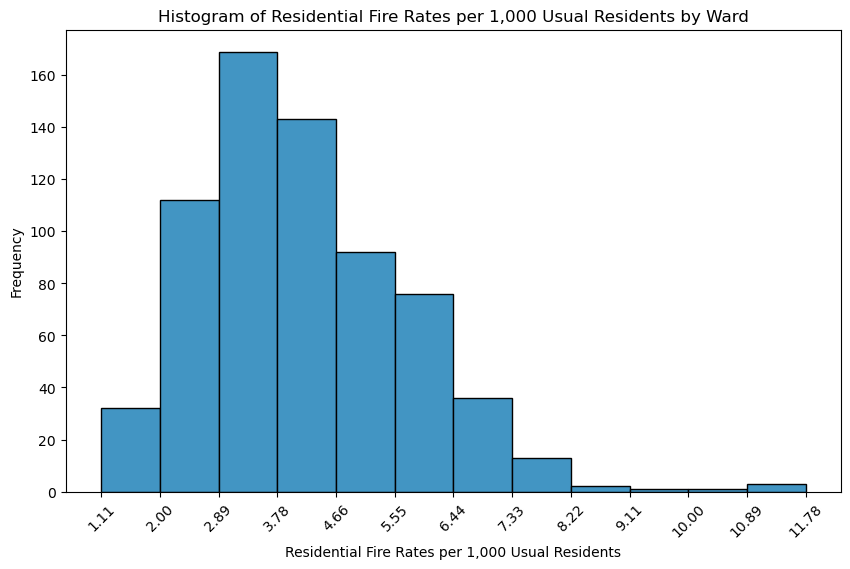

In [173]:
#import numpy as np  # For bin calculation

plt.style.use('default')  # Set the style

# Calculate bin edges (divide data into 12 bins)
num_bins = 12
bin_edges = np.linspace(fire_rates_df['FireRate'].min(), fire_rates_df['FireRate'].max(), num_bins + 1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
fire_rates_df['FireRate'].plot(
    kind='hist', 
    bins=bin_edges,  # Use custom bins to match scale
    edgecolor='black', 
    color=plt.cm.PuBu(0.6)  # Use mid-range blue from PuBu colormap
)
plt.title('Histogram of Residential Fire Rates per 1,000 Usual Residents by Ward')
plt.xlabel('Residential Fire Rates per 1,000 Usual Residents')
plt.ylabel('Frequency')
plt.grid(False)

# Update x-ticks to match the bins
plt.xticks(bin_edges, rotation=45)
plt.show()

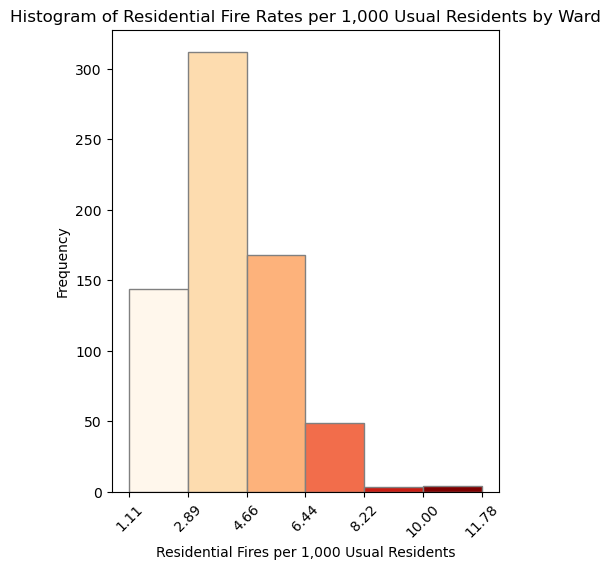

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

plt.style.use('default')  # Set the style

# Calculate bin edges (divide data into 6 bins)
num_bins = 6
bin_edges = np.linspace(fire_rates_df['FireRate'].min(), fire_rates_df['FireRate'].max(), num_bins + 1)

# Set colors using the 'OrRd' colormap
colors = plt.cm.OrRd(np.linspace(0, 1, num_bins))  # Extract 6 colors from the 'OrRd' colormap

# Plotting the histogram
plt.figure(figsize=(5, 6))
for i in range(num_bins):
    # Create histogram for each bin with the corresponding color
    plt.hist(fire_rates_df['FireRate'][fire_rates_df['FireRate'].between(bin_edges[i], bin_edges[i+1])],
             bins=[bin_edges[i], bin_edges[i+1]], edgecolor='gray', color=colors[i], label=f'{int(bin_edges[i])} - {int(bin_edges[i+1])}')

plt.title('Histogram of Residential Fire Rates per 1,000 Usual Residents by Ward')
plt.xlabel('Residential Fires per 1,000 Usual Residents')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(bin_edges, rotation=45)

# Add the legend
#plt.legend(title='Fire Rate Bins')

plt.show()


We will now plot a scatter plot to compare the raw fire counts with the number of residents in each ward.

The purpose of this plot is to determine the usefulness of introducing resident numbers as a denominator to standardize the fire counts. A working hypothesis is that the higher the usual residents in a ward, the higher the number of fire incidents. We expect to see a positive correlation between the two variables.

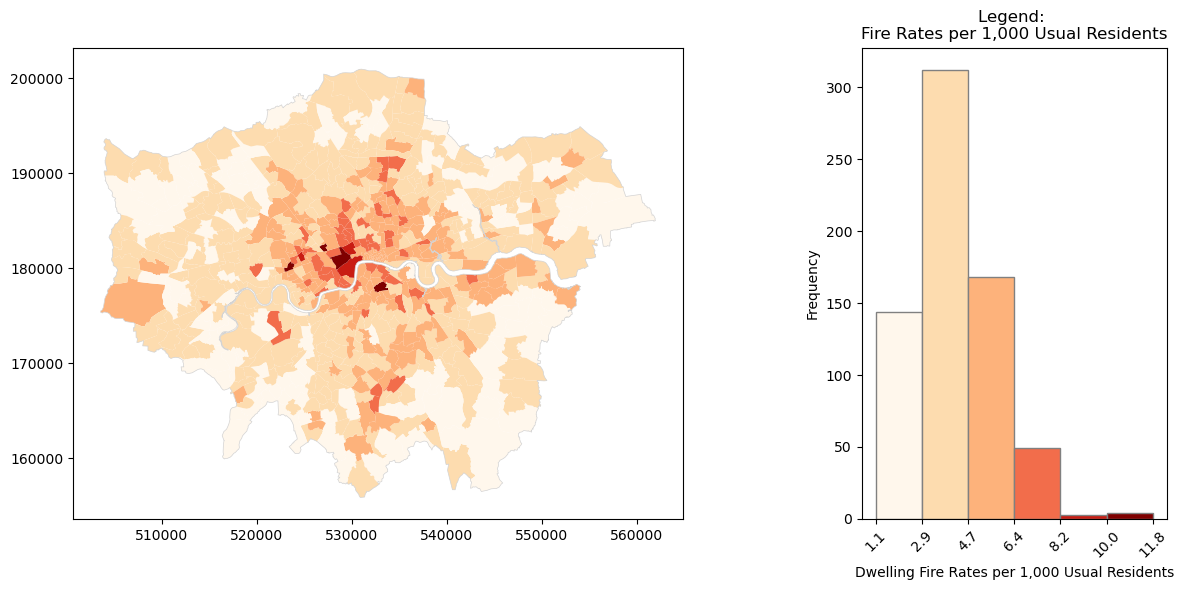

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas as gpd

# Create a figure with custom width ratios (3:1 for map and histogram)
fig, axes = plt.subplots(
    1, 2, figsize=(13, 6), 
    gridspec_kw={'width_ratios': [3, 1]}  # Map occupies 3 parts, histogram 1 part
)

# ----- Choropleth Map -----
ax_map = axes[0]  # Left subplot for the map
fire_rates_sim_gdf.plot(
    column='FireRate', 
    ax=ax_map, 
    legend=False, 
    cmap='OrRd', 
    scheme='Equal_Interval', 
    k=6,
    legend_kwds={
        'loc': 'lower right', 
        'bbox_to_anchor': (1, 0.1), 
        'title': 'Fire Rates', 
        'fontsize': 'medium'
    }
)

# Extract and plot the outermost boundary
outer_boundary = gpd.GeoSeries(fire_rates_sim_gdf.geometry.union_all())  # Merge all geometries
outer_boundary.plot(ax=ax_map, color='none', edgecolor='lightgray', linewidth=0.5)  # Highlight outer boundary

#ax_map.set_title('Map of Dwelling Fire Rates\nper 1,000 Usual Residents by Ward')

# ----- Histogram -----
ax_hist = axes[1]  # Right subplot for the histogram

# Calculate bin edges
num_bins = 6
bin_edges = np.linspace(fire_rates_df['FireRate'].min(), fire_rates_df['FireRate'].max(), num_bins + 1)

# Set colors using the 'OrRd' colormap
colors = plt.cm.OrRd(np.linspace(0, 1, num_bins))

# Plot the histogram
for i in range(num_bins):
    ax_hist.hist(
        fire_rates_df['FireRate'][fire_rates_df['FireRate'].between(bin_edges[i], bin_edges[i+1])],
        bins=[bin_edges[i], bin_edges[i+1]],
        edgecolor='gray', 
        color=colors[i],
        label=f'{bin_edges[i]:.1f} - {bin_edges[i+1]:.1f}'
    )

ax_hist.set_title('Legend: \nFire Rates per 1,000 Usual Residents')
ax_hist.set_xlabel('Dwelling Fire Rates per 1,000 Usual Residents')
ax_hist.set_ylabel('Frequency')
ax_hist.grid(False)
ax_hist.set_xticks(bin_edges)
ax_hist.set_xticklabels([f'{tick:.1f}' for tick in bin_edges], rotation=45)

# Adjust the layout
plt.tight_layout()

# Display the combined figure
plt.show()


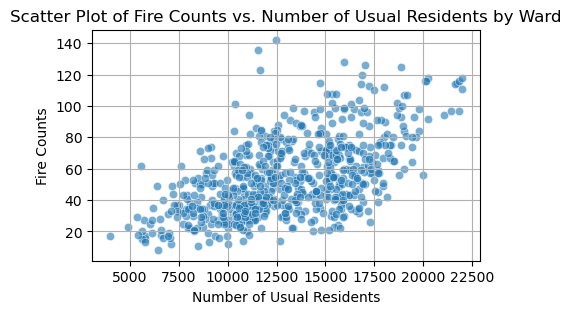

In [176]:
# Plotting the scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(fire_rates_df['all_residents'], fire_rates_df['FireCount'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Fire Counts vs. Number of Usual Residents by Ward')
plt.xlabel('Number of Usual Residents')
plt.ylabel('Fire Counts')
plt.grid(True)
plt.show()

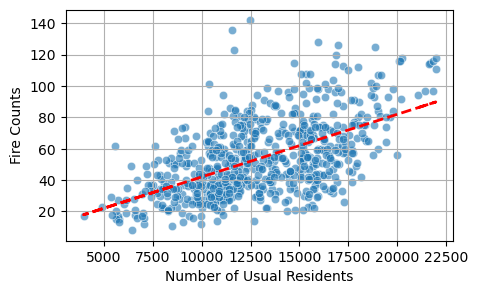

In [177]:
#import numpy as np

# Plotting the scatter plot with a line of best fit
plt.figure(figsize=(5, 3))
plt.scatter(fire_rates_df['all_residents'], fire_rates_df['FireCount'], alpha=0.6, edgecolors='w', linewidth=0.5)

# Calculate the line of best fit
x = fire_rates_df['all_residents']
y = fire_rates_df['FireCount']
coeffs = np.polyfit(x, y, 1)  # Linear regression (degree 1)
line_of_best_fit = np.poly1d(coeffs)

# Add the line of best fit to the plot
plt.plot(x, line_of_best_fit(x), color='red', linestyle='--', linewidth=2, label='Best Fit Line')

#plt.title('Scatter Plot of Fire Counts vs. Number of Usual Residents by Ward')
plt.xlabel('Number of Usual Residents')
plt.ylabel('Fire Counts')
#plt.legend()
plt.grid(True)
plt.show()


As expected, we see that there seems to be a positive correlation between the number of residents in a ward and the number of fire incidents. This is a good sign as it suggests that the fire rates we have calculated are sensible. We will now proceed to do a linear regression having these fire rates as the dependent variable.

## 4. Add independent variables that we deem important

We are now ready to merge the the `fire_rates_df` with additional census data alongside any other variables that we suspect have an influence on the fire rates experienced. 

Just as a reminder, the census data we have is from the March 2021 census and is based on the 2022 ward demarcation and the fire rates we are trying to predict are from January 2018 to November 2024. We are also focusing on residential fires only.

In [178]:
# read in tenure and households data
tenure = pd.read_csv('Tenure_TS054.csv', encoding="utf-8")
print(f"Data frame 1 is {tenure.shape[0]:,} x {tenure.shape[1]}")


# merging with our `fire_rates_df` data frame using a left join
fire_rates_tn = fire_rates_df.merge(tenure, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn.tail())
fire_rates_tn = fire_rates_tn.drop(columns=['mnemonic'])
print(fire_rates_tn.tail())
print(f"New Data frame is {fire_rates_tn.shape[0]:,} x {fire_rates_tn.shape[1]}")

Data frame 1 is 7,638 x 4
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  
675     3.280            4087              1882           46.0  
676     6.987            4848              1031           21.3  
677     6.096            3863               812           21.0  
678     2.811            4703              2241           47.7  
679     5.592            4914              1794           36.5  
New Data frame is 680 x 9


In [179]:
# read in deprivation data
deprivation = pd.read_csv('Deprived-TS011.csv', encoding="utf-8")
print(f"Data frame 1 is {deprivation.shape[0]:,} x {deprivation.shape[1]}")


# merging with our `fire_rates_tn` data frame using a left join
fire_rates_tn_dp = fire_rates_tn.merge(deprivation, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp.tail())
fire_rates_tn_dp = fire_rates_tn_dp.drop(columns=['mnemonic'])
print(fire_rates_tn_dp.tail())
print(f"New Data frame is {fire_rates_tn_dp.shape[0]:,} x {fire_rates_tn_dp.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  
675              46.4  
676              44.1  
677              46.3  
678         

In [180]:
# read in overcrowding data
overcrowding = pd.read_csv('Overcrowding-TS053.csv', encoding="utf-8")
print(f"Data frame 1 is {overcrowding.shape[0]:,} x {overcrowding.shape[1]}")

# merging with our `fire_rates_tn_dp` data frame using a left join
fire_rates_tn_dp_oc = fire_rates_tn_dp.merge(overcrowding, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc.tail())
fire_rates_tn_dp_oc = fire_rates_tn_dp_oc.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc.tail())
print(f"New Data frame is {fire_rates_tn_dp_oc.shape[0]:,} x {fire_rates_tn_dp_oc.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  
675              46.4             13.1  
676              44.1     

In [181]:
# read in ethnicity data
ethnicity = pd.read_csv('Ethnic group-TS021.csv', encoding="utf-8")
print(f"Data frame 1 is {ethnicity.shape[0]:,} x {ethnicity.shape[1]}")

# merging with our `fire_rates_tn_dp_oc` data frame using a left join
fire_rates_tn_dp_oc_eth = fire_rates_tn_dp_oc.merge(ethnicity, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc_eth.tail())
fire_rates_tn_dp_oc_eth = fire_rates_tn_dp_oc_eth.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc_eth.tail())
print(f"New Data frame is {fire_rates_tn_dp_oc_eth.shape[0]:,} x {fire_rates_tn_dp_oc_eth.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  percent_nonwhite  
675              46.4             13.1           

In [182]:
# read in heating data
heating = pd.read_csv('Heating-TS046.csv', encoding="utf-8")
print(f"Data frame 1 is {heating.shape[0]:,} x {heating.shape[1]}")

# merging with our `fire_rates_tn_dp_oc_eth` data frame using a left join
fire_rates_tn_dp_oc_eth_ht = fire_rates_tn_dp_oc_eth.merge(heating, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc_eth_ht.tail())
fire_rates_tn_dp_oc_eth_ht = fire_rates_tn_dp_oc_eth_ht.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc_eth_ht.tail())
print(f"New Data frame is {fire_rates_tn_dp_oc_eth_ht.shape[0]:,} x {fire_rates_tn_dp_oc_eth_ht.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  percent_nonwhite  percent_fuel  
675              46.4             1

In [183]:
# read in single parent (with dependent children) percentage data

single_parent = pd.read_csv('Single Parent-Dependent Children- TS003.csv', encoding="utf-8")
print(f"Data frame 1 is {single_parent.shape[0]:,} x {single_parent.shape[1]}")

# merging with our `fire_rates_tn_dp_oc_eth_ht` data frame using a left join
fire_rates_tn_dp_oc_eth_ht_sp = fire_rates_tn_dp_oc_eth_ht.merge(single_parent, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc_eth_ht_sp.tail())
fire_rates_tn_dp_oc_eth_ht_sp = fire_rates_tn_dp_oc_eth_ht_sp.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc_eth_ht_sp.tail())
print(f"New Data frame is {fire_rates_tn_dp_oc_eth_ht_sp.shape[0]:,} x {fire_rates_tn_dp_oc_eth_ht_sp.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  percent_nonwhite  percent_fuel  \
675              46.4             

In [184]:
# read in unemployment data

unemployment = pd.read_csv('Unemployed-TS066.csv', encoding="utf-8")
print(f"Data frame 1 is {unemployment.shape[0]:,} x {unemployment.shape[1]}")

# merging with our `fire_rates_tn_dp_oc_eth_ht_sp` data frame using a left join
fire_rates_tn_dp_oc_eth_ht_sp_un = fire_rates_tn_dp_oc_eth_ht_sp.merge(unemployment, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc_eth_ht_sp_un.tail())
fire_rates_tn_dp_oc_eth_ht_sp_un = fire_rates_tn_dp_oc_eth_ht_sp_un.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc_eth_ht_sp_un.tail())
print(f"New Data frame is {fire_rates_tn_dp_oc_eth_ht_sp_un.shape[0]:,} x {fire_rates_tn_dp_oc_eth_ht_sp_un.shape[1]}")

Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  percent_nonwhite  percent_fuel  \
675              46.4             

In [185]:
# read in deprivation data ( 3 or more dimensions of deprivation)

deprivation3 = pd.read_csv('Deprivation3-TS011.csv', encoding="utf-8")
print(f"Data frame 1 is {deprivation3.shape[0]:,} x {deprivation3.shape[1]}")

# merging with our `fire_rates_tn_dp_oc_eth_ht_sp_un` data frame using a left join
fire_rates_tn_dp_oc_eth_ht_sp_un_dp3 = fire_rates_tn_dp_oc_eth_ht_sp_un.merge(deprivation3, left_on='WD22CD', right_on='mnemonic', how='left')
#print(fire_rates_tn_dp_oc_eth_ht_sp_un_dp2.tail())
fire_rates_tn_dp_oc_eth_ht_sp_un_dp3 = fire_rates_tn_dp_oc_eth_ht_sp_un_dp3.drop(columns=['mnemonic'])
print(fire_rates_tn_dp_oc_eth_ht_sp_un_dp3.tail())


Data frame 1 is 7,638 x 2
        WD22CD                 WD22NM  Inner_Lon  FireCount  all_residents  \
675  E05014116        Streatham Wells          1       32.0         9757.0   
676  E05014117               Vauxhall          1       68.0         9733.0   
677  E05014118  Waterloo & South Bank          1       54.0         8858.0   
678  E05014119           West Dulwich          1       32.0        11384.0   
679  E09000001         City of London          1       48.0         8583.0   

     FireRate  all_households  owned_households  percent_owned  \
675     3.280            4087              1882           46.0   
676     6.987            4848              1031           21.3   
677     6.096            3863               812           21.0   
678     2.811            4703              2241           47.7   
679     5.592            4914              1794           36.5   

     percent_deprived  percent_crowded  percent_nonwhite  percent_fuel  \
675              46.4             

So far so good! We have successfully merged the fire rates with the available and relevant census data. It should be noted that this is not a comprehensive set of variables that influence fire rates, all the same, it is a good enough begining to analyse the factors that influence fire rates in London.

We will now proceed to export this dataframe as a csv file, which we will later use in another notebook to do our linear regression.

In [186]:
# export the final data frame to a csv file
fire_rates_tn_dp_oc_eth_ht_sp_un_dp3.to_csv('fire_rates_regression_data.csv', index=False)